In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rc('font', family="Cambria")

#! 根据模型修改
# ppi, ppi-woppm, rnn, rnn-woppm
model_name = "ppi"

In [11]:
results_dir = f"./results/{model_name}"
values = defaultdict(list)
errors = defaultdict(list)
mins = defaultdict(list)
maxs = defaultdict(list)
layers_num = len(os.listdir(results_dir)) // 2
for c in [3, 8]:
    for fn in ['emb'] + list(range(layers_num-1)):
        lines = open(os.path.join(results_dir, f"{str(fn)}-{c}"+".eval"), "r").readlines()
        for line in lines:
            avg, stdev, _min, _max = line.strip().split()
            values[c].append(float(avg))
            errors[c].append(float(stdev))
            mins[c].append(float(_min))
            maxs[c].append(float(_max))

0.706-0.02
0.75-0.02
0.721-0.016
0.658-0.02
0.59-0.029
0.512-0.018
0.477-0.018
0.44-0.01
0.433-0.009
0.421-0.009

0.584-0.015
0.623-0.016
0.592-0.023
0.535-0.015
0.463-0.026
0.387-0.006
0.347-0.024
0.319-0.024
0.312-0.016
0.292-0.014



KeyboardInterrupt: 

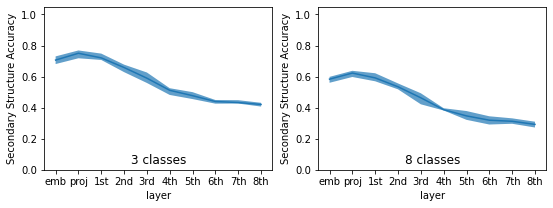

In [29]:
# fig, subs = plt.subplots(1, 2, figsize=(10, 5))
fig, subs = plt.subplots(1, 2, figsize=(9, 3))

xs = list(range(1, 11))
xticks = ["emb", "proj", "1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th"]
colors = ["#407088", "#a37eba"]
classes = [3, 8]

xs = xs[:layers_num]
xticks = xticks[:layers_num]
xlim = layers_num + 0.5

for i in range(2):
    ax = subs[i]
    ax.set_xlim(0.5, xlim, 1)
    ax.set_ylim(0, 1.05)
    ax.set_xlabel("layer")
    ax.set_ylabel("Secondary Structure Accuracy")
    ax.set_xticks(range(1, layers_num+1), xticks)

    c = classes[i]
    _accs = np.array(values[c])
    _errors = np.array(errors[c])
    _mins = np.array(mins[c])
    _maxs = np.array(maxs[c])

    for idx in range(len(_accs)):
        print(f"{round(_accs[idx], 3)}-{round(_errors[idx], 3)}")
    print()
    ax.fill_between(xs, _mins, _maxs, alpha=0.7)
    ax.plot(xs, _accs)
    ax.set_title(f"{c} classes", y=0)

# bar3 = fig.errorbar(xs, values[3], yerr=errors[3], label="3 classes", color=colors[0], capsize=3, marker="o", ms=4)
# bar8 = fig.errorbar(xs, values[8],  yerr=errors[8], label="8 classes", color=colors[1], capsize=3, marker="o", ms=4)

# fig.legend(frameon=False)
# fig.legend(frameon=False)
# subs[idx].errorbar(xs, values[c], yerr=errors[c], label=f"{c}-class", capsize=3, marker="o", ms=4)

plt.savefig(f"./ss-{model_name}.pdf", bbox_inches='tight')